# Diabetes Prediction using Supervised Machine Learning

### Import Libraries

In [1]:
#Installation of required libraries
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action = "ignore") 

In [2]:
#Load the dataset
df = pd.read_csv("diabetes.csv")

BRIEF DESCRIPTIVE STATISTICS

In [3]:
# Preview Data. The first 5 observation units of the data set were accessed.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Dataset dimensions - (rows, columns). It consists of 768 observation units and 9 variables.
df.shape

(768, 9)

In [5]:
# Features data-type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Descriptive statistics of the data set accessed.
df.describe([0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,210.0000,293.00000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00


In [7]:
# Statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**Observations:**
  - 1. There are a total of 768 records and 9 features in the dataset.
  - 2. Each feature can be either of integer or float dataype.
  - 3. Some features like Glucose, Blood pressure , Insulin, BMI have zero values which represent missing data.
  - 4. There are zero NaN values in the dataset.
  - 5. In the outcome column, 1 represents diabetes positive and 0 represents diabetes negative.

# PART 1

#### EXPLORATIVE DATA ANALYSIS (EDA)

In [8]:
# Now let' see that what are the columns available in our dataset.
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
# To know more about the dataset with transpose - here T is for the transpose 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [11]:
# Now let's check that if our dataset have null values or not
df.isnull().head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [12]:
# Now let's check that if our dataset have null values or not
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


**Note:**

- Here from above code we first checked that: 

    - is there any null values from isnull() function? 

   - Taking the sum of all those missing values from sum() function,
     and the inference we now get is that there are no missing values,
     but that is actually not a true story as in this particular
     dataset all the missing values were given the 0 as value which
     is not good for the authenticity of the dataset.

- Hence we will first replace the 0 value to NAN value then start the imputation process.

In [13]:
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# Showing the Count of NANs
print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


**Note:**

   - As mentioned above that now we will be replacing the zeros with the NAN values so that we can impute it later to maintain the authenticity of the dataset as well as trying to have better Imputation approach i.e to apply mean values of each column to the null values of the respectove columns.

#### DATA VISUALIZATION

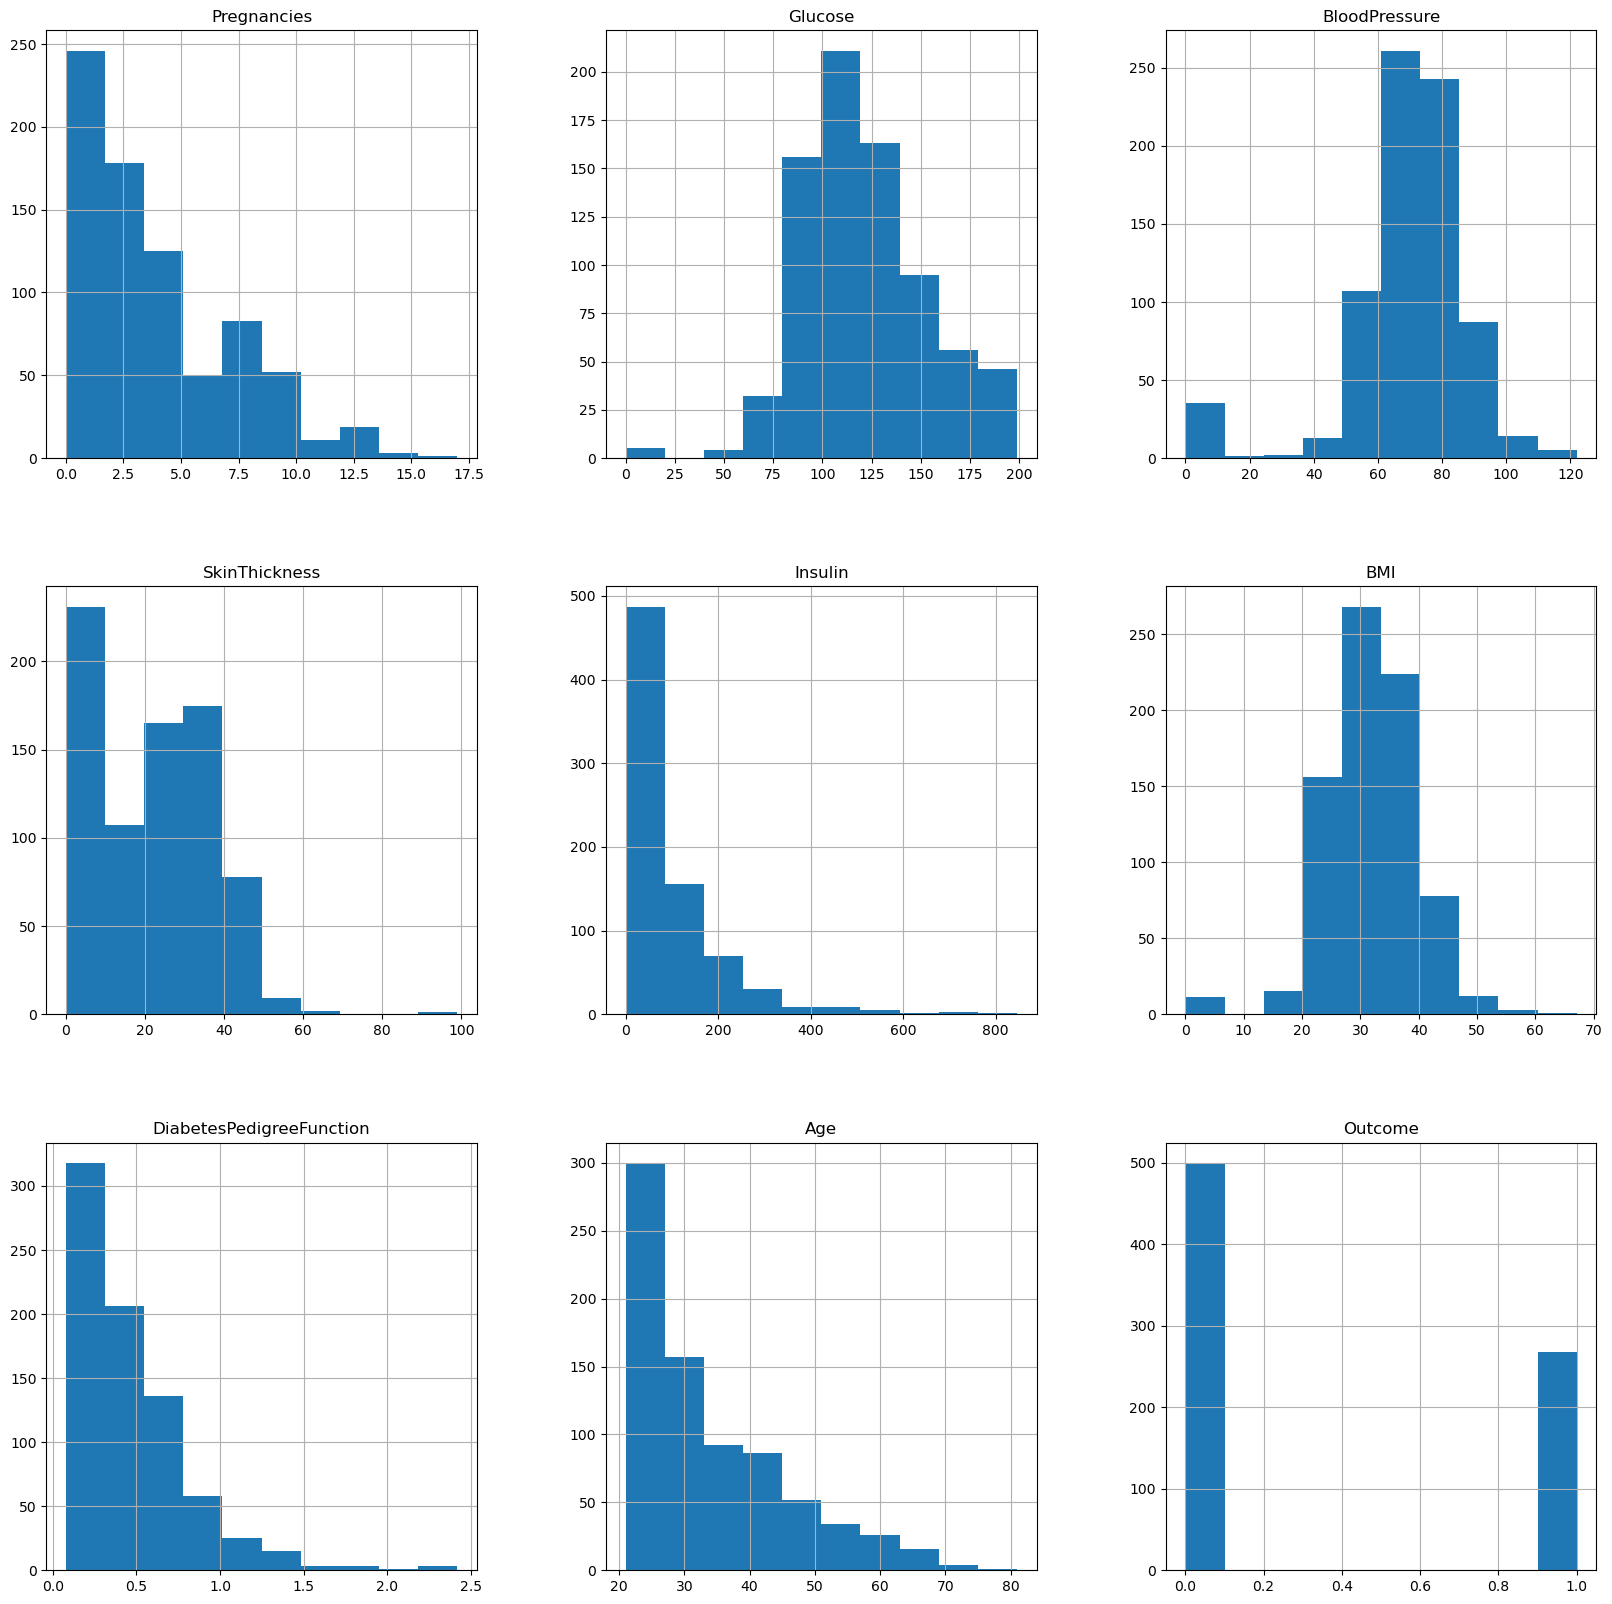

In [14]:
# Plotting the data distribution plots before removing null values 
p = df.hist(figsize = (20,20))

<Axes: xlabel='BMI', ylabel='Density'>

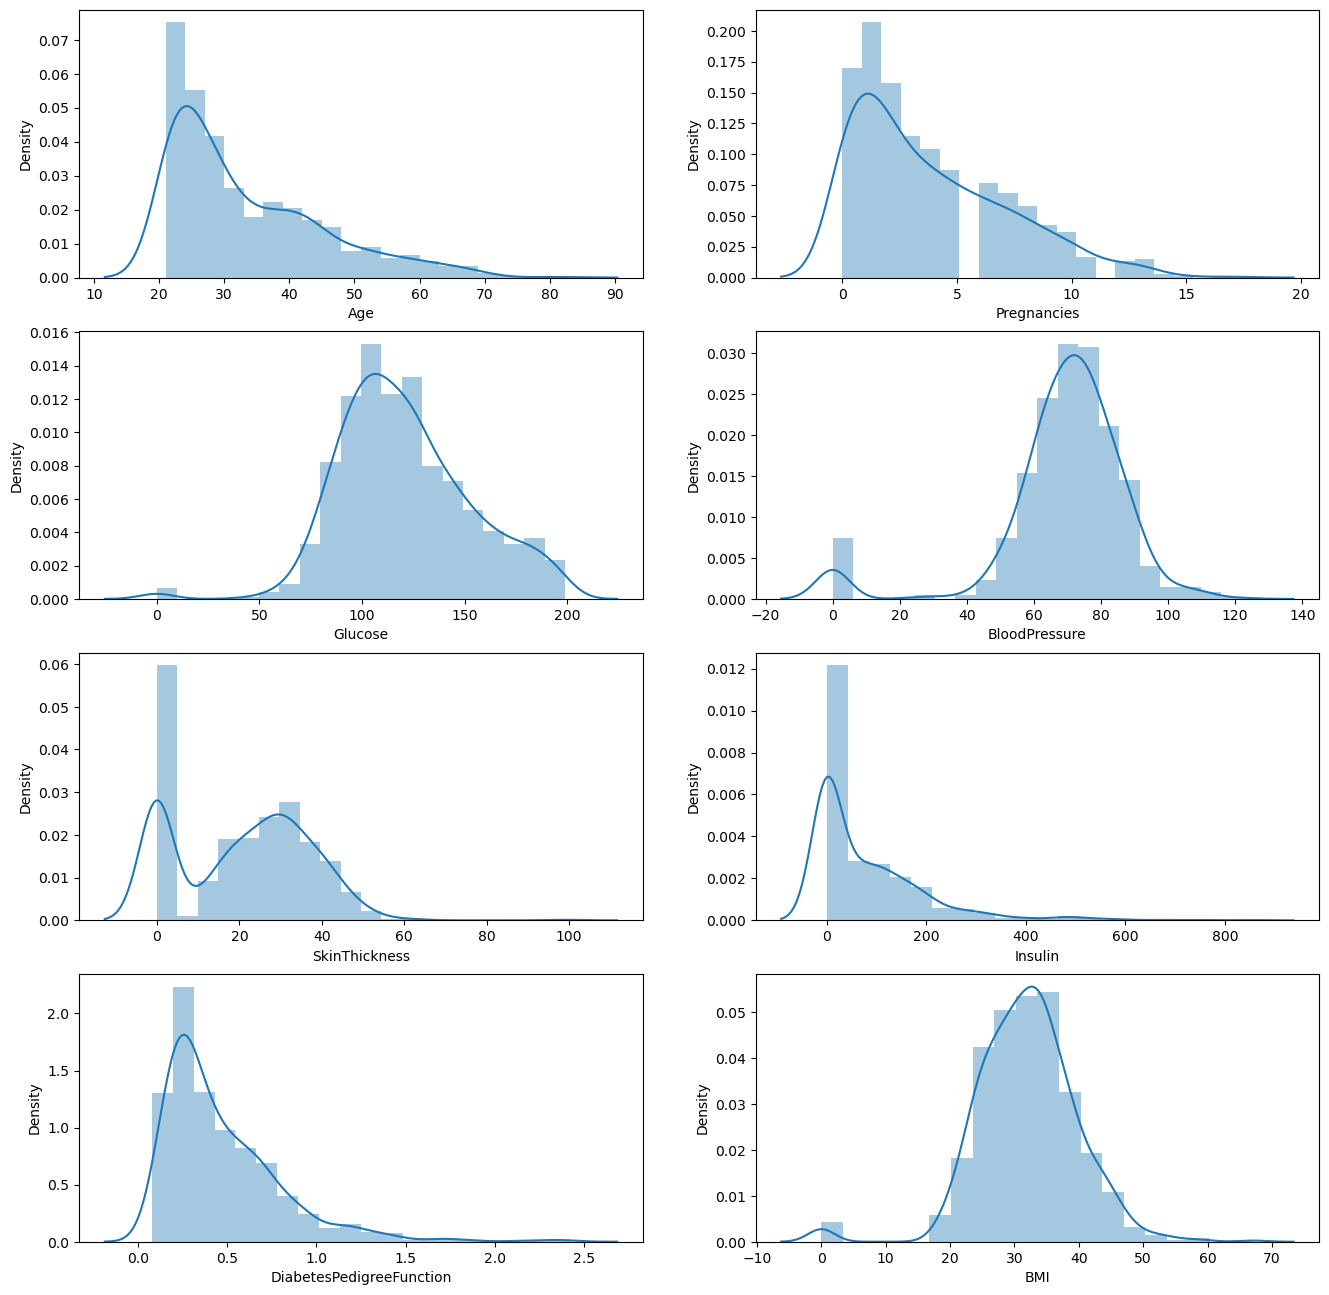

In [15]:
# Histogram and density graphs of all variables were accessed.
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(df.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(df.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(df.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(df.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(df.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(df.BMI, bins = 20, ax=ax[3,1]) 

**Note:**

- Here we see the distribution of each features whether it is dependent data or independent data and one thing which could always strikes that why do we need to see the distribution of data ? 

- The answer: it is the best way to start the analysis of the dataset as it shows the occurence of every kind of value in the graphical structure which in turn let us know the range of the data 

In [16]:
# Now we will be imputing the mean value of the column to each missing value of that particular column
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)

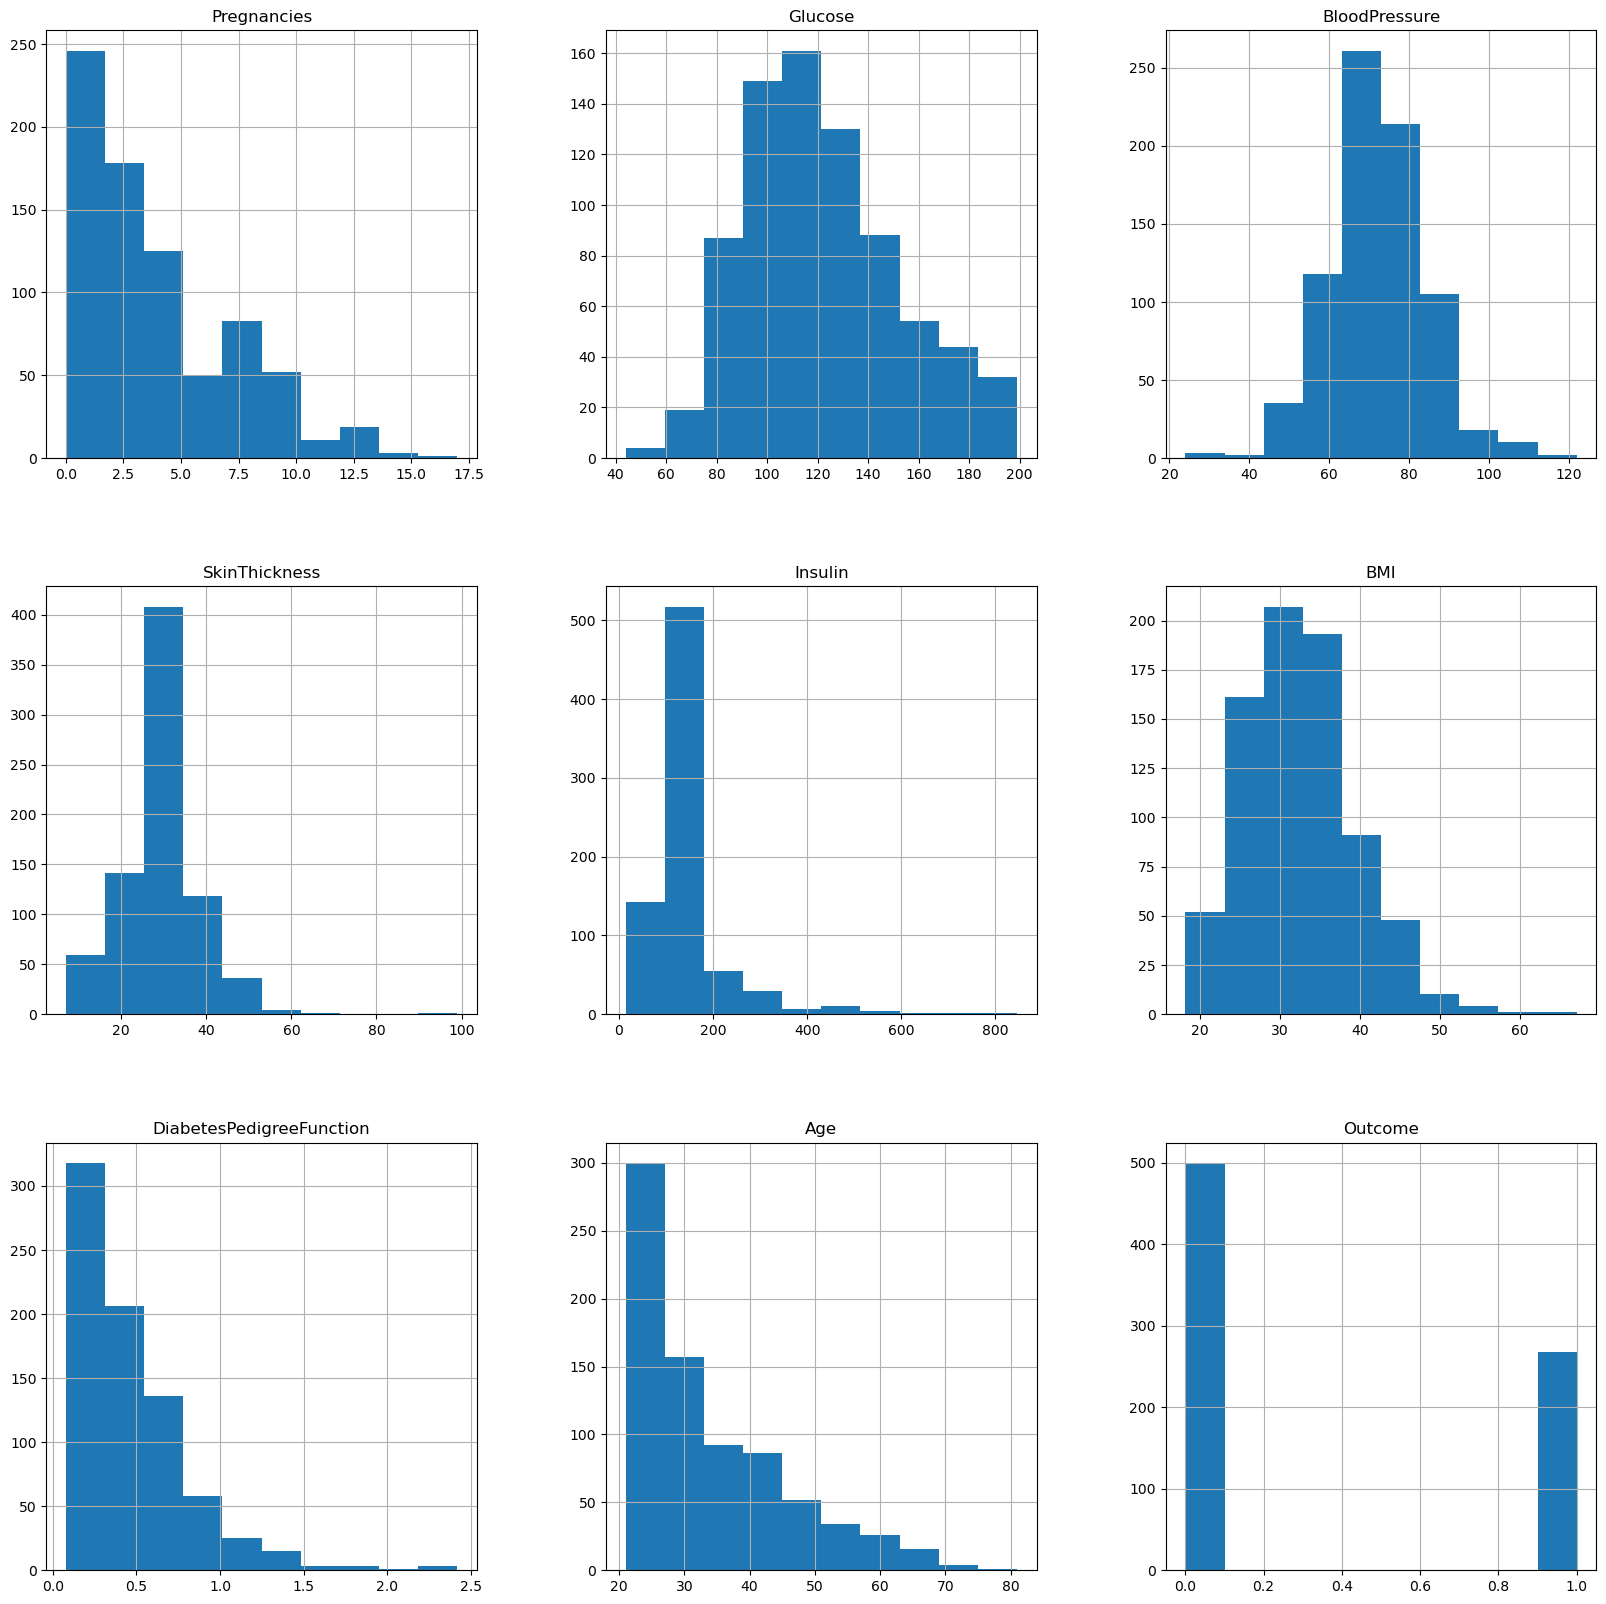

In [17]:
# Plotting the distributions after removing the NAN values
p = df_copy.hist(figsize = (20,20))

<Axes: xlabel='BMI', ylabel='Density'>

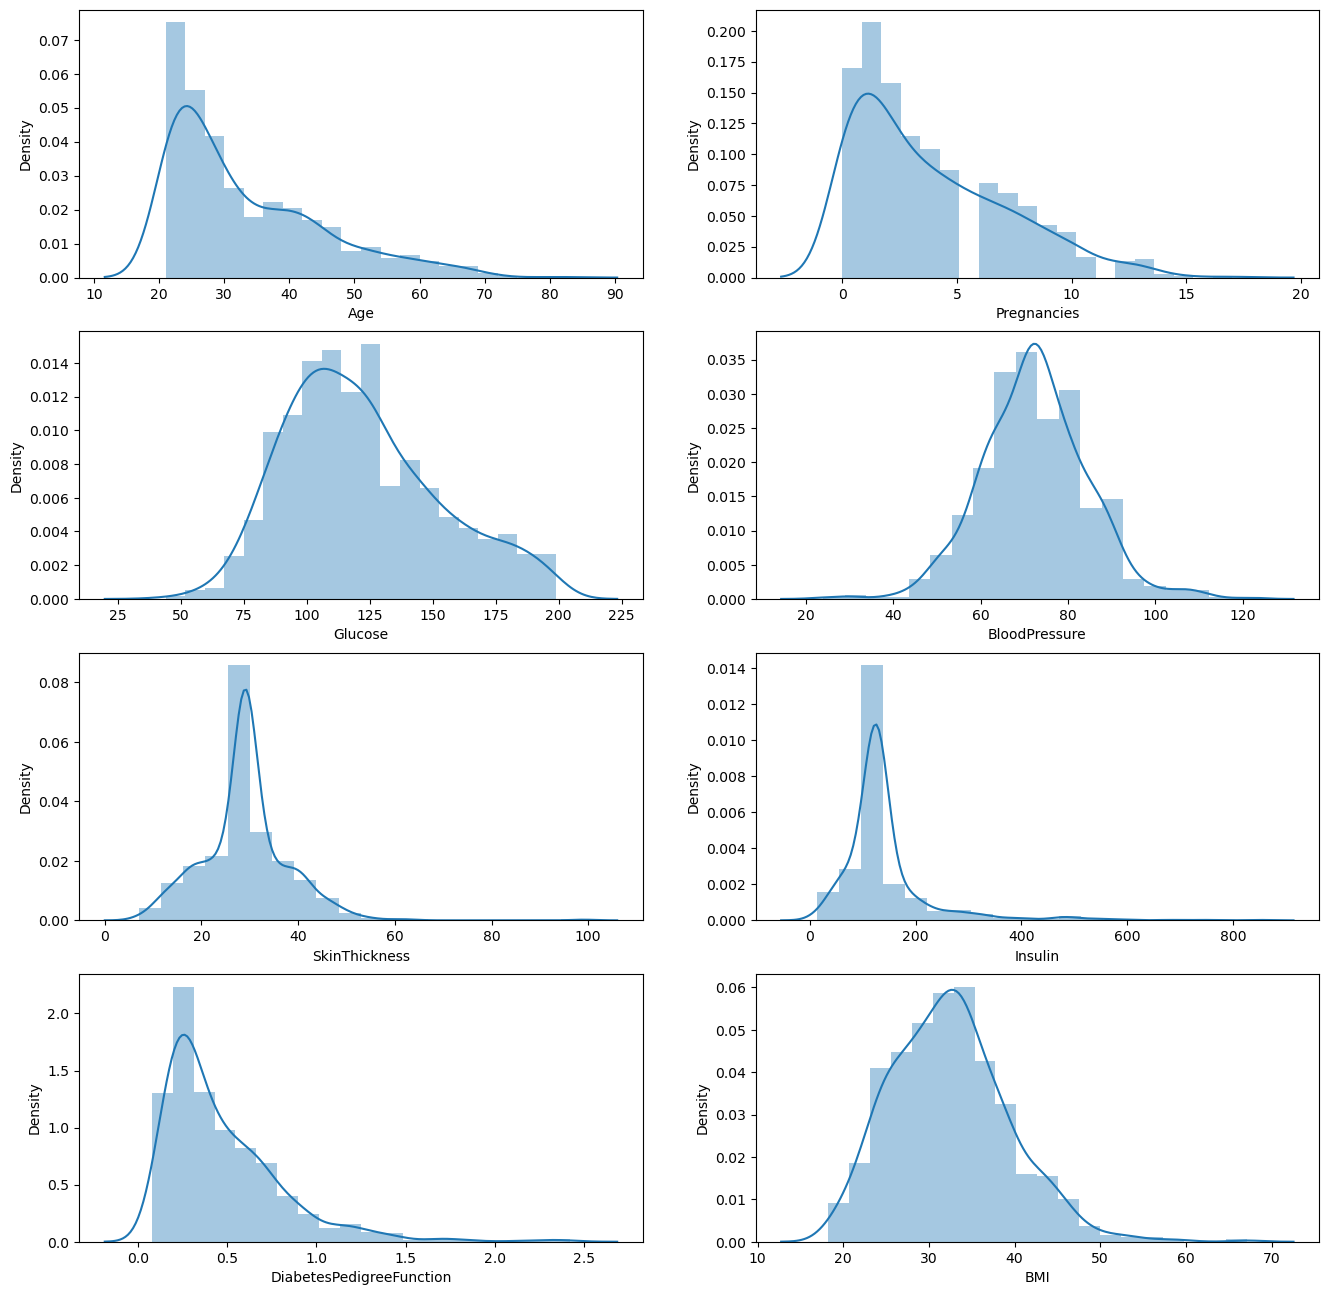

In [18]:
# Histogram and density graphs of all variables were accessed.
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(df_copy.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(df_copy.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(df_copy.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(df_copy.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(df_copy.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(df_copy.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(df_copy.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(df_copy.BMI, bins = 20, ax=ax[3,1]) 

**Note:**

   - Here we are again using the hist plot and density plot to see the distribution of the dataset
   
   - Using this visualization to see the changes that we can see after those null values are removed from the dataset and we can clearly see the difference for example - In Insulin column after removal of the null values we can see that there is a spike at the range of 50 to 100 which is quite logical as well.

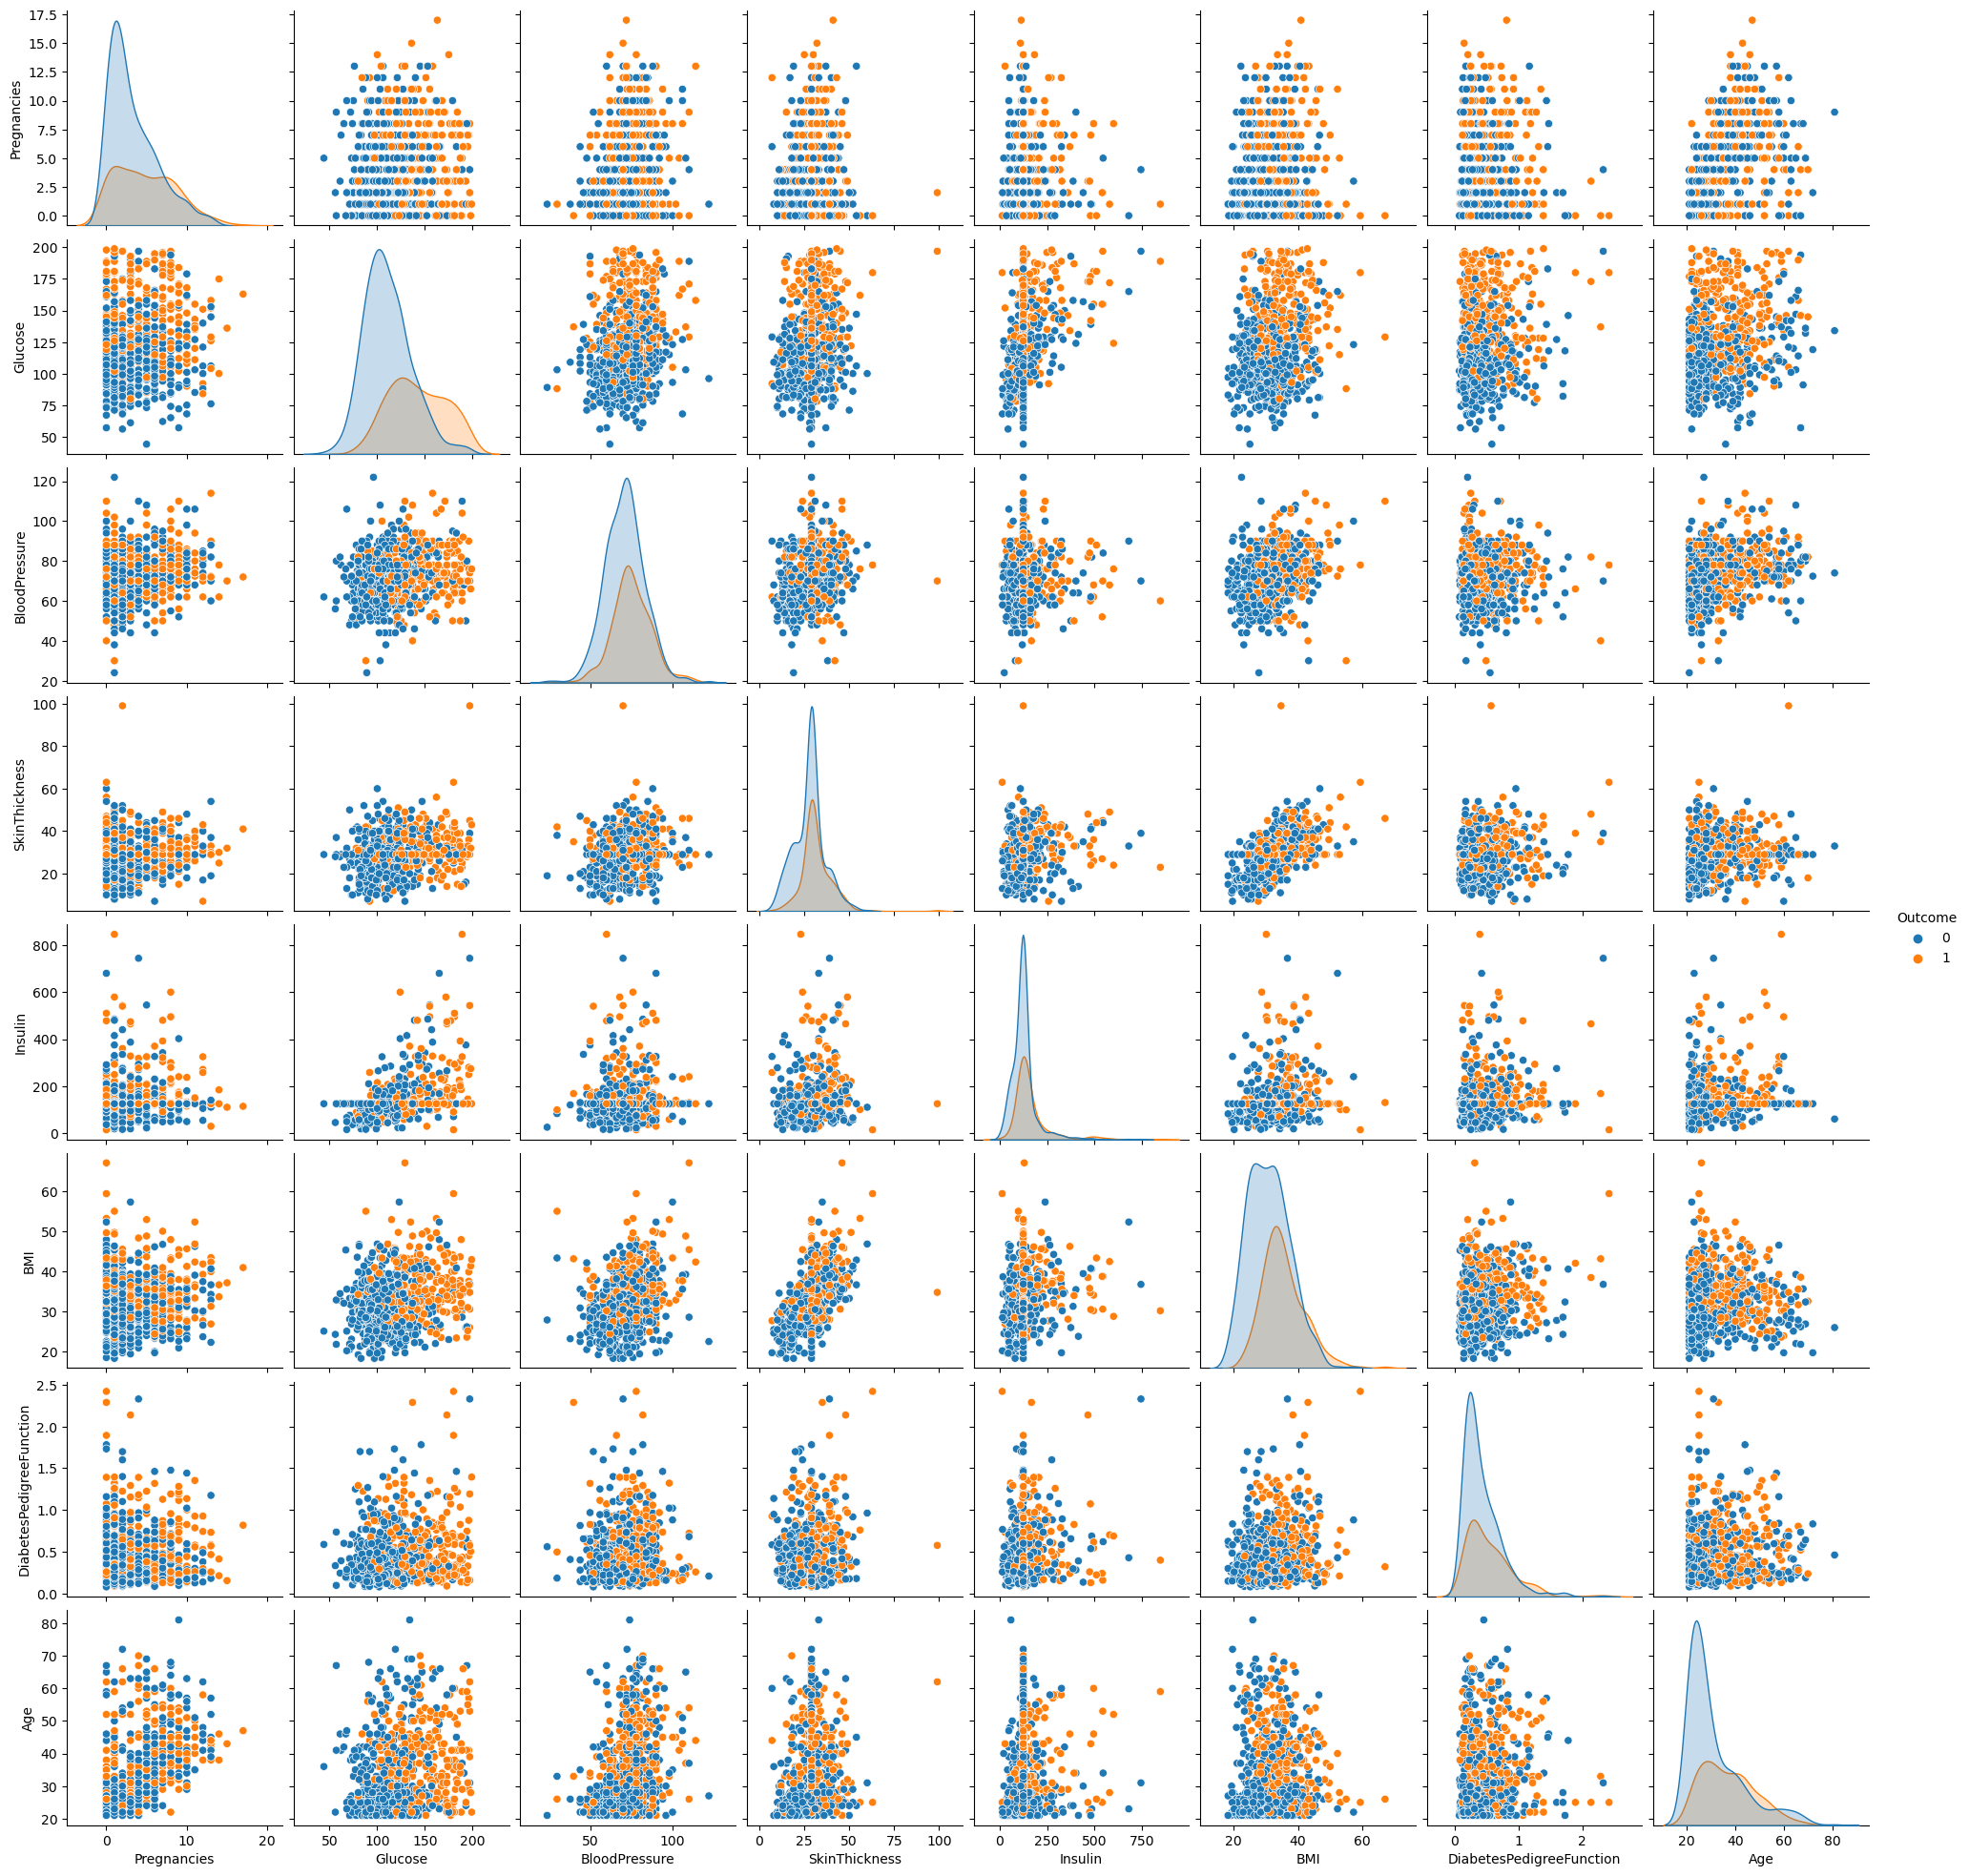

In [19]:
# Pairplot 
sns.pairplot(data = df_copy, hue = 'Outcome')
plt.show()

**Observations:**

 - 1. The countplot tells us that the dataset is imbalanced, as number of patients who don't have diabetes is more than those who do.
 - 2. From the correaltion heatmap, we can see that there is a high correlation between Outcome and [Glucose,BMI,Age,Insulin]. We can select these features to accept input from the user and predict the outcome.

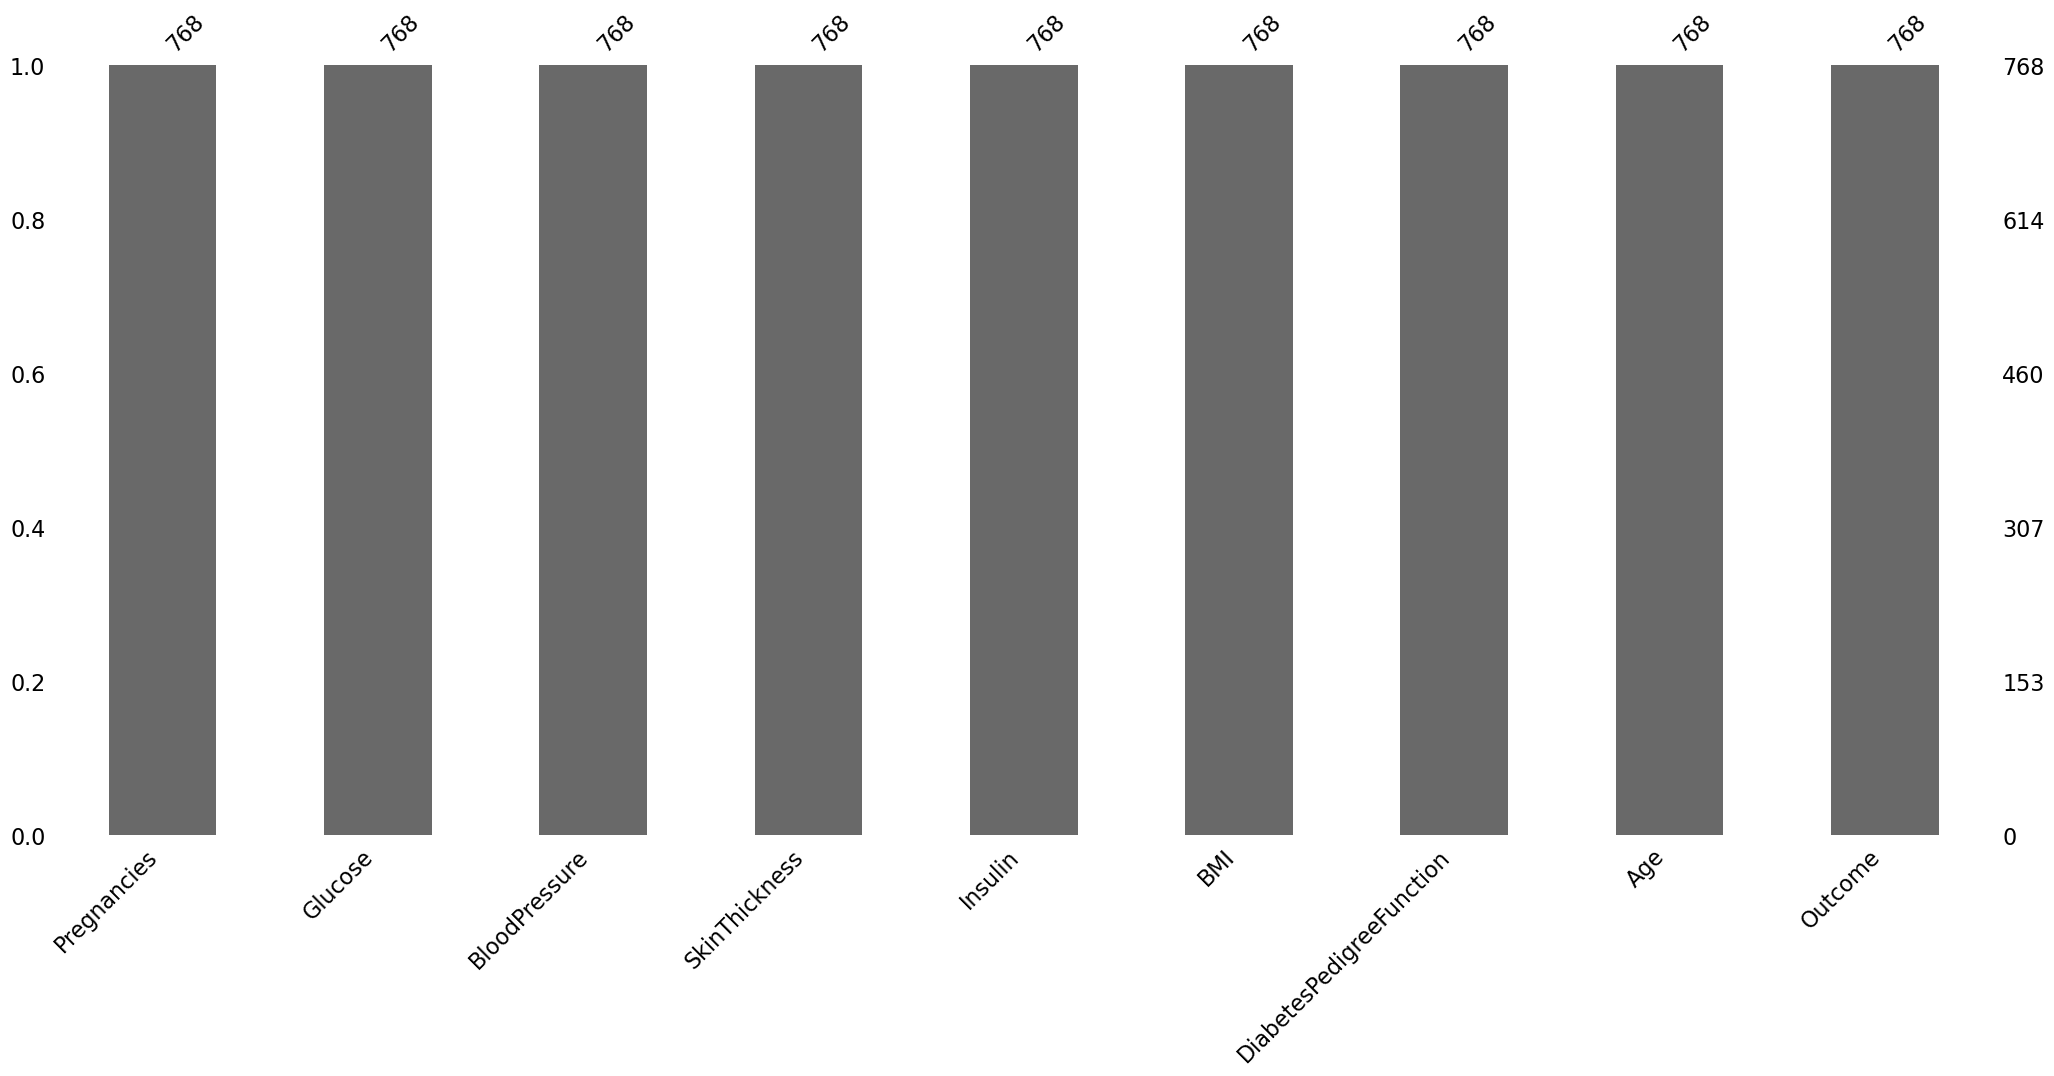

In [20]:
# Plotting Null Count Analysis Plot
import missingno as msno
p = msno.bar(df)

**Inference :** Now in the above graph also we can clearly see that there are no null values in the dataset

<Axes: >

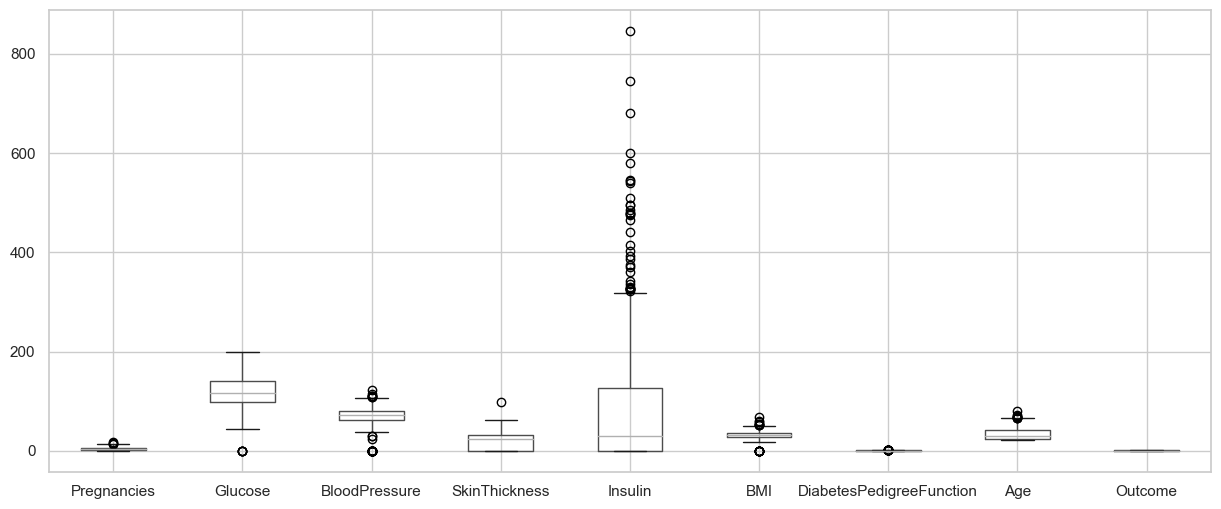

In [21]:
#box plot for outlier visualization
sns.set(style="whitegrid")
df.boxplot(figsize=(15,6))

**AVERAGE PREDICTOR VARIABLES**

In [22]:
# mean number of "Pregnancies" is approximately 3.298 for records with an "Outcome" 
# value of 0 and approximately 4.866 for records with an "Outcome" value of 1. 
# This provides insights into the average number of pregnancies for each group,
# which can be useful for comparing the two groups and understanding how the "Pregnancies" variable is related to the "Outcome" variable.

df.groupby("Outcome").agg({"Pregnancies":"mean"})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [23]:
df.groupby("Outcome").agg({"Age":"mean"})

,Age
Outcome,
0,31.190000
1,37.067164


In [24]:
df.groupby("Outcome").agg({"Age":"max"})

,Age
Outcome,
0,81
1,70


In [25]:
df.groupby("Outcome").agg({"Insulin": "mean"})

,Insulin
Outcome,
0,68.792000
1,100.335821


In [26]:
df.groupby("Outcome").agg({"Insulin": "max"})

,Insulin
Outcome,
0,744
1,846


In [27]:

df.groupby("Outcome").agg({"Glucose": "mean"})

,Glucose
Outcome,
0,109.980000
1,141.257463


In [28]:
df.groupby("Outcome").agg({"BMI": "mean"})

,BMI
Outcome,
0,30.304200
1,35.142537


**DISTRIBUTION HOW PREDICTOR VARIABLES DIFFER FOR INDIVIDUALS WITH OR WITHOUT DIABETED**

In [29]:
df_with = df[df['Outcome'] == 1]

df_with

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [30]:
df_without = df[df['Outcome'] == 0]

df_without

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


**VISUALIZING TARGET VARIABLE**

In [31]:
# The classes of the outcome variable were examined.
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

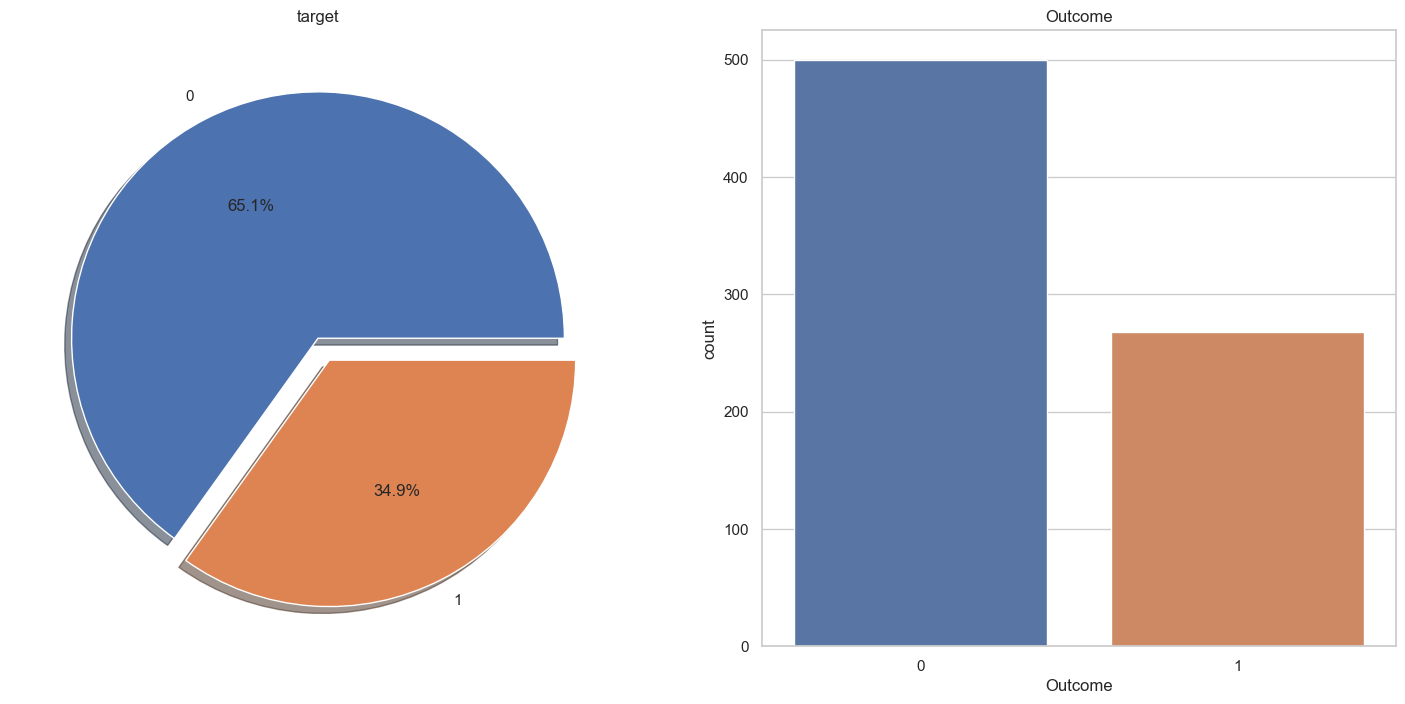

In [32]:
# The distribution of the outcome variable in the data was examined and visualized.
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df['Outcome'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot(x='Outcome', data=df, ax=ax[1])  # Correct the 'data' argument here
ax[1].set_title('Outcome')
plt.show()

**Inference :** From the above visualization it is clearly visible that our dataset is completely imbalanced infact the number of patient who is diabetic is half of the patients who are non-diabetic


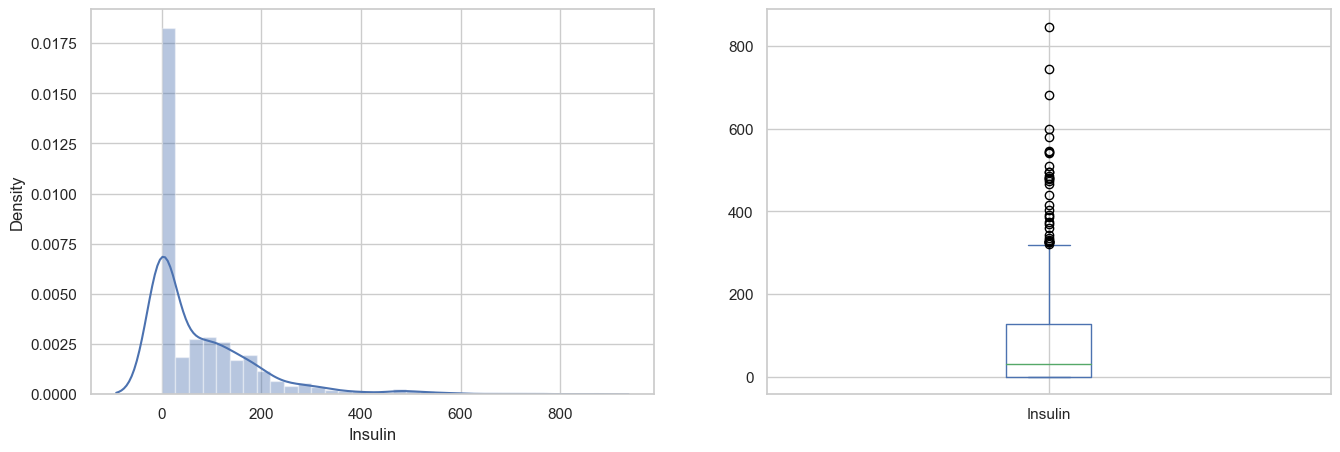

In [33]:
plt.subplot(121), sns.distplot(df['Insulin'])
plt.subplot(122), df['Insulin'].plot.box(figsize=(16,5))
plt.show()

**Note:**

That's how distplot can be helpful where one will able to see the distribution of the data as well as with the help of boxplot one can see the outliers in that column and other information too which can be derieved by the box and whiskers plot

#### CORRELATION BETWEEN ALL THE FEATURES

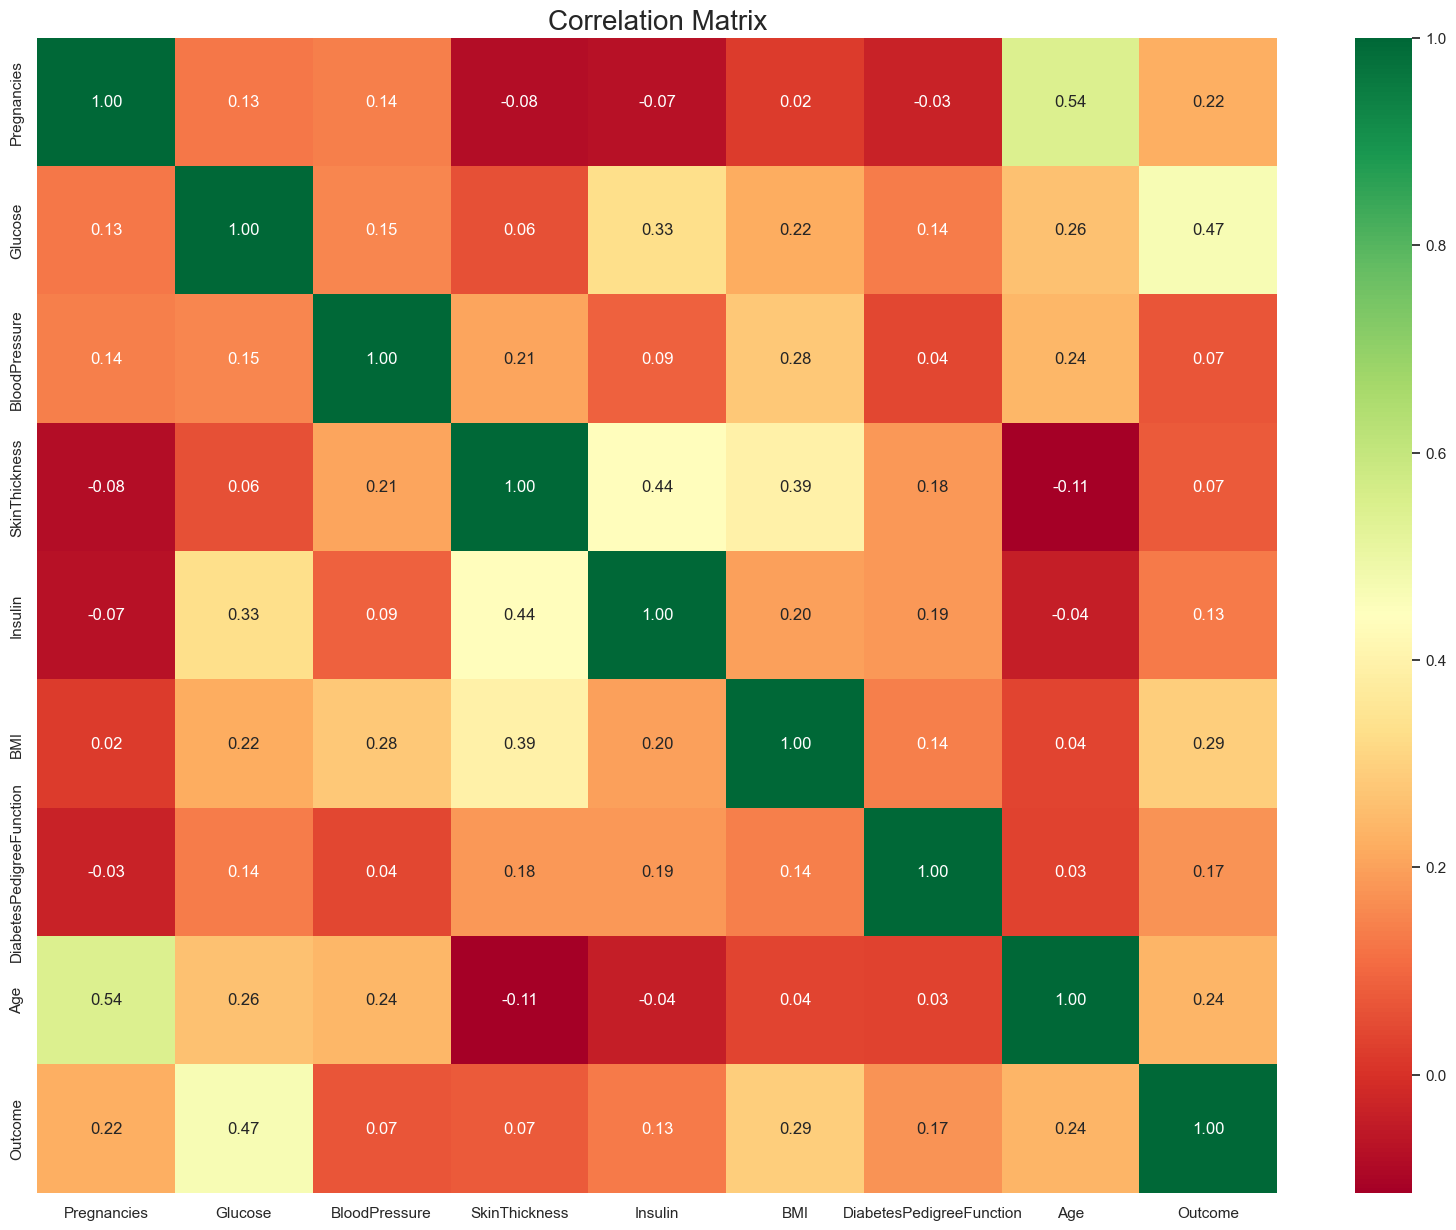

<Figure size 1200x1000 with 0 Axes>

In [34]:
# Correlation between all the features before cleaning
f, ax = plt.subplots(figsize= [20,15])
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap ='RdYlGn')  # seaborn has an easy method to showcase heatmap
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()



In [35]:
# Perform correlation for dataset
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


# PART II

#### A.  DATA PREPROCESSING

##### HANDLING MISSING DATA

In [36]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


We see on df.head() that some features contain 0, it doesn't make sense here and this indicates missing value Below we replace 0 value by NaN:

In [37]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [38]:
# Now, we can look at where are missing values
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

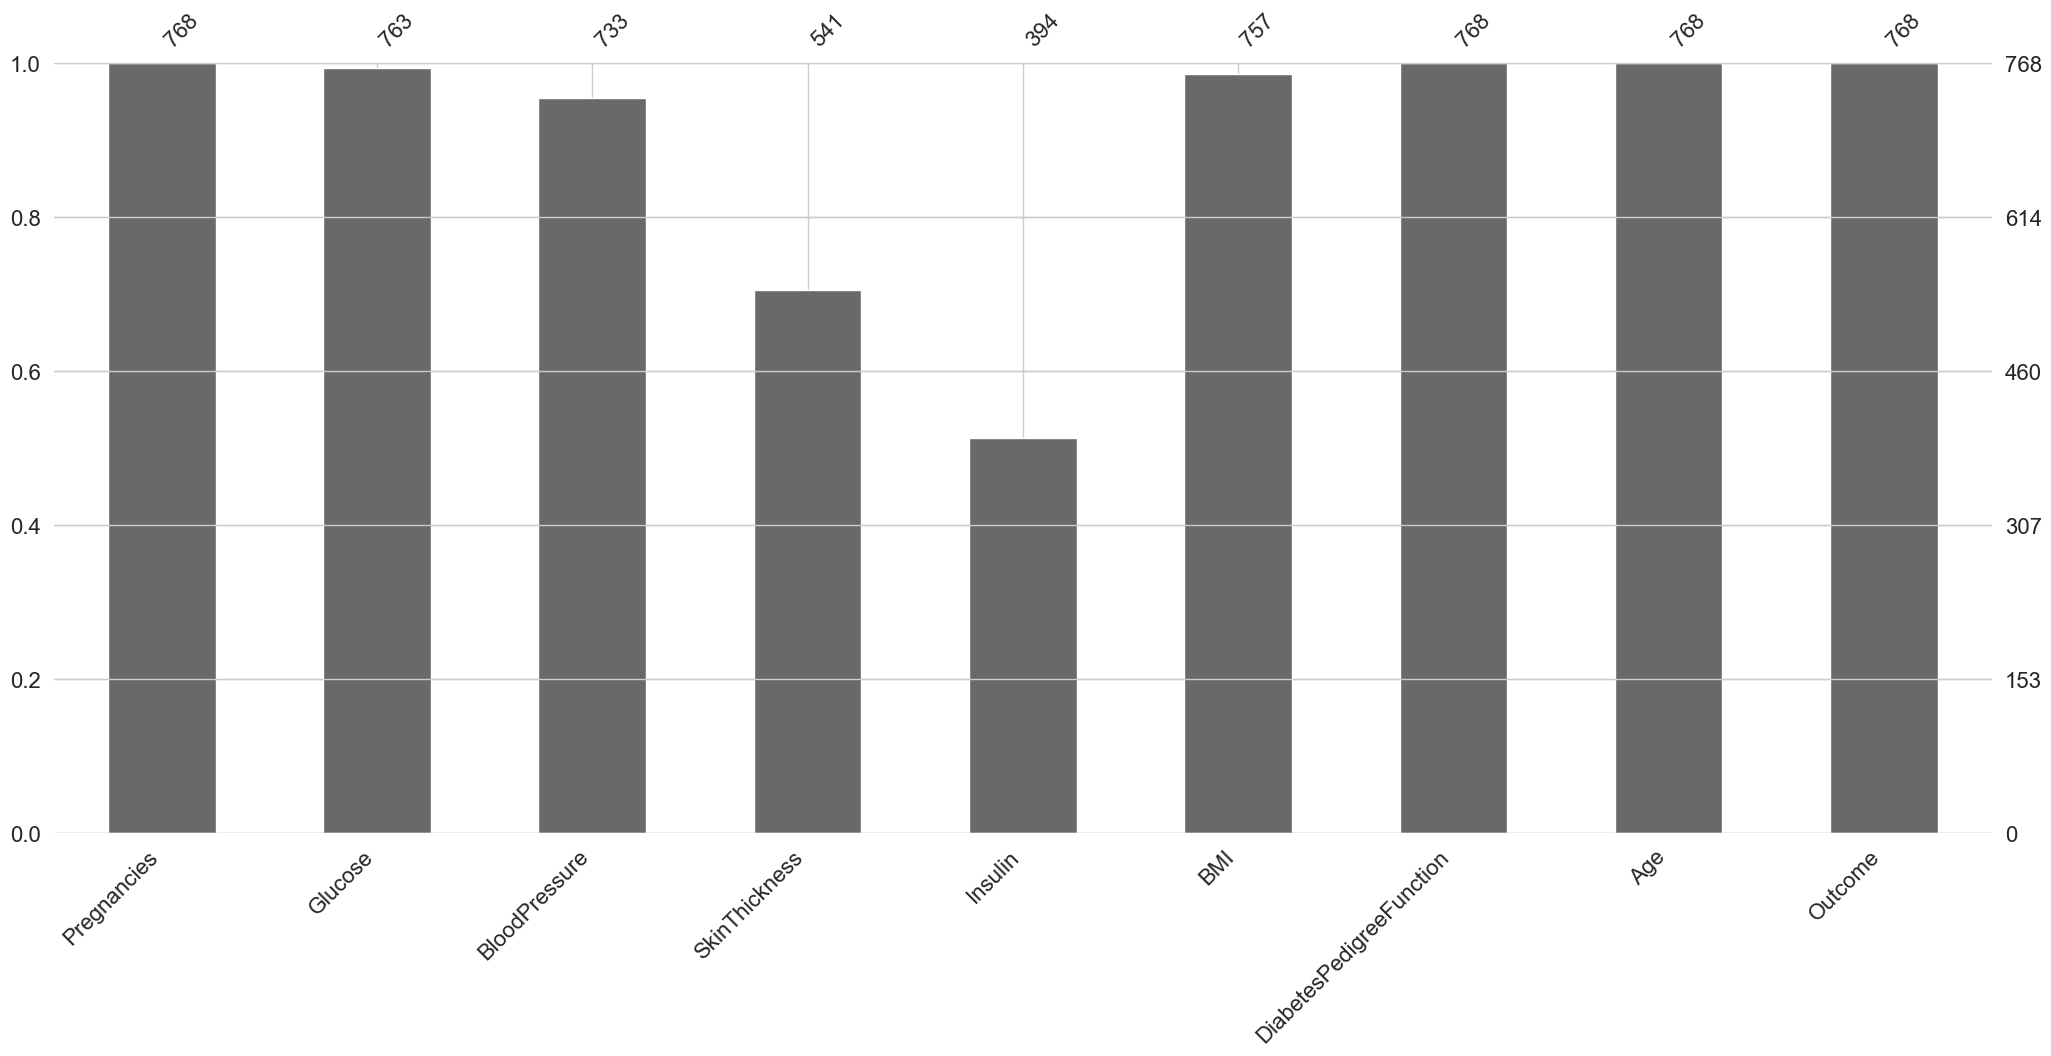

In [39]:
# Have been visualized using the missingno library for the visualization of missing observations.
# Plotting 
import missingno as msno
msno.bar(df);

We had earlier replaced the missing values with mean values of each feature, recall df_copy

In [40]:
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# Showing the Count of NANs
print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [41]:
# Now we will be imputing the mean value of the column to each missing value of that particular column
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)

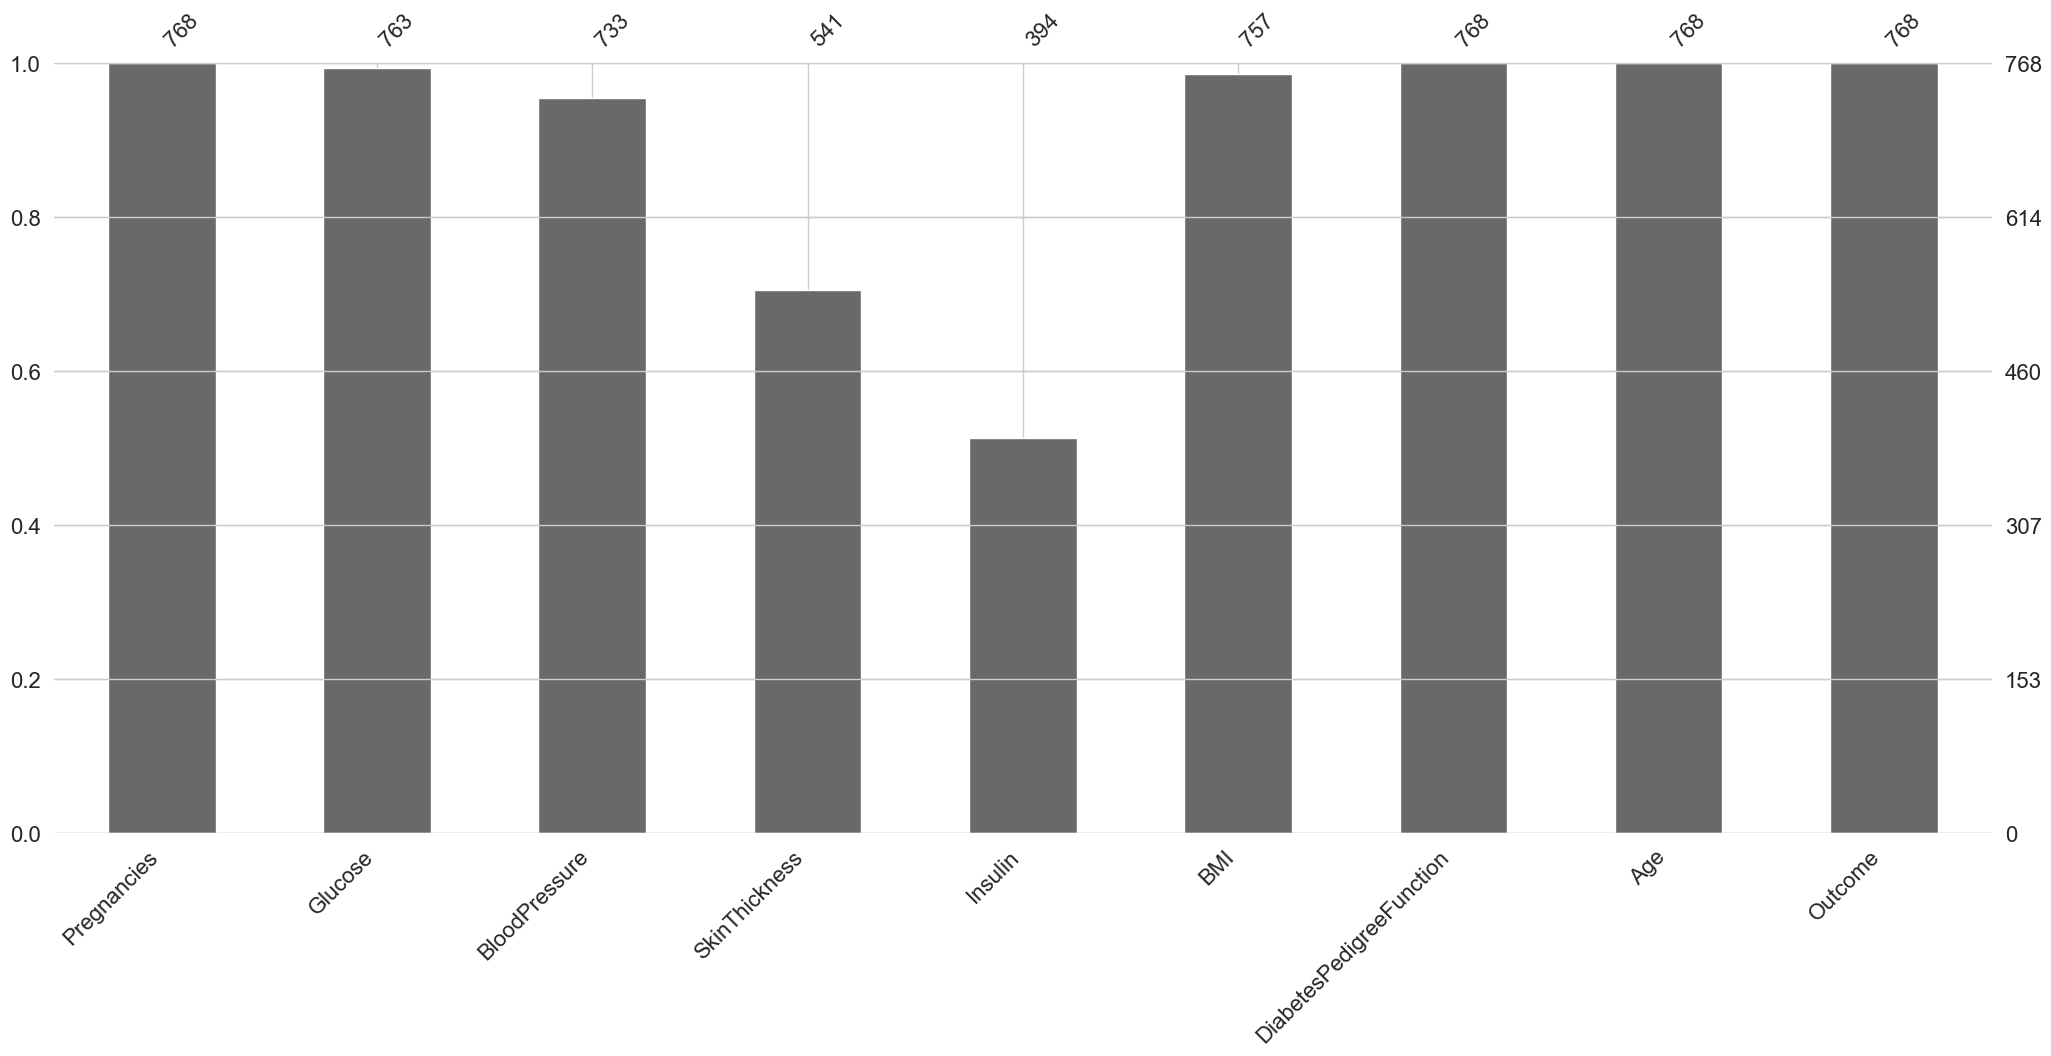

In [42]:
# Plotting Null Count Analysis Plot
import missingno as msno
p = msno.bar(df)

In [43]:
# Missing values were filled.
df_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### HANDLING OUTLIERS

In [44]:
# In the data set, there were asked whether there were any outlier observations compared to the 25% and 75% quarters.
# It was found to be an outlier observation.
for feature in df:
    
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if df[(df[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


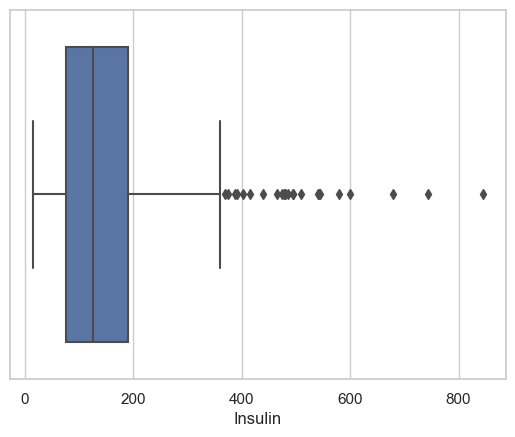

In [45]:
# The process of visualizing the Insulin variable with boxplot method was done. We find the outlier observations on the chart.
import seaborn as sns
sns.boxplot(x = df["Insulin"]);

In [46]:
#We conduct a stand alone observation review for the Insulin variable
#We suppress contradictory values
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df.loc[df["Insulin"] > upper,"Insulin"] = upper

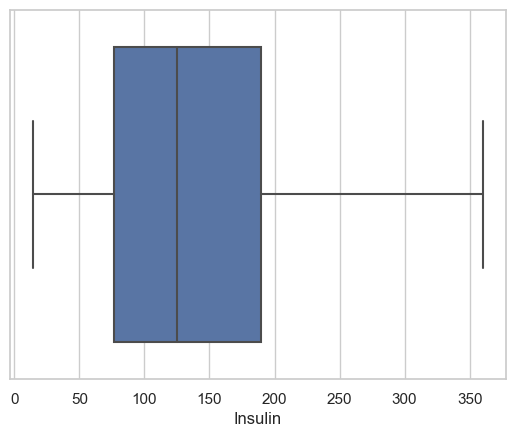

In [47]:
import seaborn as sns
sns.boxplot(x = df["Insulin"]);

USING LOCAL OUTLIER FACTOR (LOF)

In [48]:
# We determine outliers between all variables with the LOF method
from sklearn.neighbors import LocalOutlierFactor
lof =LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(df_copy)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [49]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:30]

array([-3.30445978, -2.92355055, -2.48884101, -2.11712977, -2.10639247,
       -2.01096252, -1.95451646, -1.85895703, -1.85635277, -1.80461588,
       -1.76303893, -1.74754923, -1.7083314 , -1.61794121, -1.61146741,
       -1.6114475 , -1.59485319, -1.5883628 , -1.57982204, -1.56001231,
       -1.54747971, -1.54303907, -1.54193274, -1.52690503, -1.51916379,
       -1.51432101, -1.50402523, -1.50055984, -1.50037921, -1.49619189])

In [50]:
#We choose the threshold value according to lof scores
threshold = np.sort(df_scores)[7]
threshold

-1.8589570296505833

In [51]:
#We delete those that are higher than the threshold
outlier = df_scores > threshold
df = df[outlier]

In [52]:
# The size of the data set was examined.
df.shape

(760, 9)

#### B. FEATURE ENGINEERING

#### Creating new variables is important for models.

For this data set, some new variables were created according to BMI, Insulin, glucose and Age variables.

In [53]:
# According to BMI, some ranges were determined and categorical variables were assigned.
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")
df["NewBMI"] = NewBMI
df.loc[df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"] > 18.5) & (df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"] > 24.9) & (df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"] > 29.9) & (df["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"] > 34.9) & (df["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
df.loc[df["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

In [54]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,Obesity 1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,Overweight
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3


In [55]:
# A categorical variable creation process is performed according to the insulin value.
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

In [56]:
# The operation performed was added to the dataframe.
df = df.assign(NewInsulinScore=df.apply(set_insulin, axis=1))

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,Obesity 1,Abnormal
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,Overweight,Abnormal
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,Normal,Abnormal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal


In [57]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
df["NewGlucose"] = NewGlucose
df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [58]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,Obesity 1,Abnormal,Secret
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,Overweight,Abnormal,Normal
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,Normal,Abnormal,Secret
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal,Secret


In [59]:
# Some intervals were determined according to the aGE variable and these were assigned categorical variables.
NewAge = pd.Series(["Young_Adult", "Adult", "Older_Adult", "Retirees", "Seniors"], dtype = "category")
df["NewAge"] = NewAge
df.loc[df['Age'].between(20, 29), "NewAge"] = 'Young_Adult'
df.loc[df['Age'].between(30, 44), "NewAge"] = 'Adult'
df.loc[df['Age'].between(45, 59), "NewAge"] = 'Older_Adult'
df.loc[df['Age'].between(60, 79), "NewAge"] = 'Retirees'
df.loc[df['Age'] >80, "NewAge"] = 'Seniors'

In [60]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose,NewAge
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,Obesity 1,Abnormal,Secret,Older_Adult
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,Overweight,Abnormal,Normal,Adult
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,Normal,Abnormal,Secret,Adult
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal,Young_Adult
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal,Secret,Adult


In [61]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose,NewAge
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,Obesity 1,Abnormal,Secret,Older_Adult
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,Overweight,Abnormal,Normal,Adult
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,Normal,Abnormal,Secret,Adult
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal,Young_Adult
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal,Secret,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,Obesity 1,Abnormal,Overweight,Retirees
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0,Obesity 2,Abnormal,Overweight,Young_Adult
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,Overweight,Normal,Overweight,Adult
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1,Obesity 1,Abnormal,Overweight,Older_Adult


#### ONE HOT ENCODING

Categorical variables in the data set should be converted into numerical values.

For this reason, these transformation processes are performed with Label Encoding and One Hot Encoding method.

In [62]:
# Here, by making One Hot Encoding transformation, categorical variables were converted into numerical values.
# It is also protected from the Dummy variable trap.
df = pd.get_dummies(df, columns =["NewBMI","NewInsulinScore", "NewGlucose", "NewAge"], drop_first = True)

In [63]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,...,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret,NewAge_Older_Adult,NewAge_Retirees,NewAge_Seniors,NewAge_Young_Adult
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,True,...,False,False,False,False,False,True,True,False,False,False
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,False,...,False,False,False,True,False,False,False,False,False,False
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,False,...,False,False,False,False,False,True,False,False,False,False
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,False,...,False,True,False,True,False,False,False,False,False,True
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,False,...,False,False,False,False,False,True,False,False,False,False


In [64]:
categorical_df = df[['NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret', 'NewAge_Older_Adult', 'NewAge_Retirees', 'NewAge_Seniors', 'NewAge_Young_Adult']]

In [65]:
categorical_df.head()

,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret,NewAge_Older_Adult,NewAge_Retirees,NewAge_Seniors,NewAge_Young_Adult
0,True,False,False,False,False,False,False,False,False,True,True,False,False,False
1,False,False,False,True,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,True,False,True,False,True,False,False,False,False,False,True
4,False,False,True,False,False,False,False,False,False,True,False,False,False,False


In [66]:
y = df["Outcome"]
X = df.drop(["Outcome",'NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret', 'NewAge_Older_Adult', 'NewAge_Retirees', 'NewAge_Seniors', 'NewAge_Young_Adult'], axis = 1)
cols = X.columns
index = X.index

In [67]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [68]:
# The variables in the data set are an effective factor in increasing the performance of the models by standardization.  
# There are multiple standardization methods. These are methods such as" Normalize"," MinMax"," Robust" and "Scale".
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)

In [69]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.6,0.765432,0.000,0.428571,NaN,0.142857,0.672313,1.235294
1,-0.4,-0.790123,-0.375,0.000000,NaN,-0.626374,-0.046906,0.117647
2,1.0,1.629630,-0.500,NaN,NaN,-0.989011,0.789577,0.176471
3,-0.4,-0.691358,-0.375,-0.428571,-0.273731,-0.461538,-0.526384,-0.470588
4,-0.6,0.493827,-2.000,0.428571,0.379691,1.186813,5.000651,0.235294


In [70]:
X = pd.concat([X,categorical_df], axis = 1)

In [71]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,...,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret,NewAge_Older_Adult,NewAge_Retirees,NewAge_Seniors,NewAge_Young_Adult
0,0.6,0.765432,0.000,0.428571,NaN,0.142857,0.672313,1.235294,True,False,...,False,False,False,False,False,True,True,False,False,False
1,-0.4,-0.790123,-0.375,0.000000,NaN,-0.626374,-0.046906,0.117647,False,False,...,False,False,False,True,False,False,False,False,False,False
2,1.0,1.629630,-0.500,NaN,NaN,-0.989011,0.789577,0.176471,False,False,...,False,False,False,False,False,True,False,False,False,False
3,-0.4,-0.691358,-0.375,-0.428571,-0.273731,-0.461538,-0.526384,-0.470588,False,False,...,False,True,False,True,False,False,False,False,False,True
4,-0.6,0.493827,-2.000,0.428571,0.379691,1.186813,5.000651,0.235294,False,False,...,False,False,False,False,False,True,False,False,False,False


In [72]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

### HANDLING IMBALANCED DATA

  The imbalanced dataset will be handled as follows:
   - 1. The use of selected Alogorithm(or model),
   - 2. Using different evaluation matrix, such as accuracy, precision, recall, F1-score, and ROC-AUC

   Please refer to Part III. Imbalance dataset was handled indept.

# PART III

#### MODEL BUILD

**SPLITTING DATA**


In [73]:
#Splitting the dataset
# features and targets
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [74]:
# Splitting X and Y
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify = df['Outcome'] )

In [75]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (608, 22)
X_test shape: (152, 22)
y_train shape: (608,)
y_test shape: (152,)


In [76]:
#Check columns with zero values - checking this time so that right data should go for model training

print("Total number of rows: {0}", format(len(df)))
print("Number of rows missing Pregnancies: {0}",
      format(len(df.loc[df['Pregnancies']==0])))
print("Number of rows missing Glucose: {0}"
      , format(len(df.loc[df['Glucose']==0])))
print("Number of rows missing BloodPressure: {0}",
      format(len(df.loc[df['BloodPressure']==0])))
print("Number of rows missing SkinThickness: {0}",
      format(len(df.loc[df['SkinThickness']==0])))
print("Number of rows missing Insulin: {0}",
      format(len(df.loc[df['Insulin']==0])))
print("Number of rows missing BMI: {0}",
      format(len(df.loc[df['BMI']==0])))
print("Number of rows missing DiabetesPedigreeFunction: {0}",
      format(len(df.loc[df['DiabetesPedigreeFunction']==0])))
print("Number of rows missing Age: {0}", format(len(df.loc[df['Age']==0])))

Total number of rows: {0} 760
Number of rows missing Pregnancies: {0} 109
Number of rows missing Glucose: {0} 0
Number of rows missing BloodPressure: {0} 0
Number of rows missing SkinThickness: {0} 0
Number of rows missing Insulin: {0} 0
Number of rows missing BMI: {0} 0
Number of rows missing DiabetesPedigreeFunction: {0} 0
Number of rows missing Age: {0} 0


In [77]:
#Check columns with Nans - checking this time so that right data should go for model training
import numpy as np
print(np.isnan(X_train).sum())
print(np.isnan(X_test).sum())


Pregnancies                   0
Glucose                       4
BloodPressure                28
SkinThickness               187
Insulin                     302
BMI                           8
DiabetesPedigreeFunction      0
Age                           0
NewBMI_Obesity 1              0
NewBMI_Obesity 2              0
NewBMI_Obesity 3              0
NewBMI_Overweight             0
NewBMI_Underweight            0
NewInsulinScore_Normal        0
NewGlucose_Low                0
NewGlucose_Normal             0
NewGlucose_Overweight         0
NewGlucose_Secret             0
NewAge_Older_Adult            0
NewAge_Retirees               0
NewAge_Seniors                0
NewAge_Young_Adult            0
dtype: int64
Pregnancies                  0
Glucose                      1
BloodPressure                7
SkinThickness               39
Insulin                     70
BMI                          3
DiabetesPedigreeFunction     0
Age                          0
NewBMI_Obesity 1             0
NewB

NaNs observed in dataset

In [78]:
from sklearn.impute import SimpleImputer

# Create a SimpleImputer for filling NaN values with 0
fill_values = SimpleImputer(strategy='constant', fill_value=0)

# Fit and transform the imputer on your data
X_train = fill_values.fit_transform(X_train)
X_test = fill_values.transform(X_test)  # Use transform, not fit_transform for the test data


In [79]:
# Checking if NaNs were replaced with 0
print(np.isnan(X_train).sum())
print(np.isnan(X_test).sum())

0
0


#### MODELS:

**SUPPORT VECTOR CLASSIFIER (SVC) MODELLING**

In [80]:
#Building the model using Support Vector Machine (SVM)

from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [81]:
X_train.shape, X_test.shape

((608, 22), (152, 22))

**TRAINING AND TESTING MODEL**

In [82]:
#Predict
y_pred = svc_model.predict(X_test)


In [83]:
cv_scores = cross_val_score(estimator = svc_model, X = X_train, y = y_train, cv = 10)
cv_scores.mean()

0.7614207650273224

Text(0.5, 20.049999999999997, 'Predicted Label')

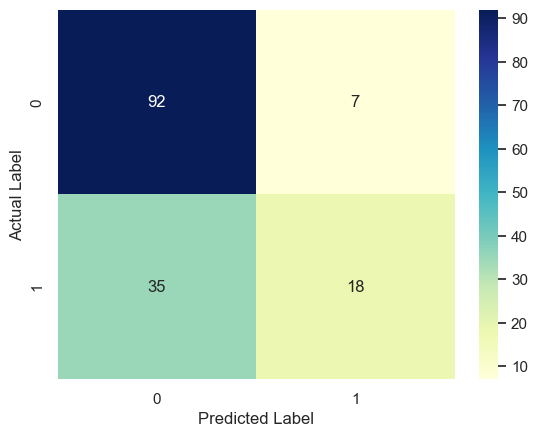

In [84]:
#Metrics for SVM
cnf_matix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matix, annot = True, cmap = "YlGnBu", fmt = 'd')
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")

In [85]:
#Accuracy score for SVM
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81        99
           1       0.72      0.34      0.46        53

    accuracy                           0.72       152
   macro avg       0.72      0.63      0.64       152
weighted avg       0.72      0.72      0.69       152



**RANDOM FOREST MODELLING**

In [86]:
#Builidng the model using RandomForest

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200)


**TRAINING AND TESTING MODEL**

In [87]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [88]:
y_pred = rf_model.predict(X_test)

In [89]:
print("Accuracy_Score:", accuracy_score(y_test, y_pred))

Accuracy_Score: 0.7302631578947368


In [90]:
#Accuracy score for RFC
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.91      0.81        99
           1       0.70      0.40      0.51        53

    accuracy                           0.73       152
   macro avg       0.72      0.65      0.66       152
weighted avg       0.72      0.73      0.71       152



In [91]:
cv_scores = cross_val_score(estimator = rf_model, X = X_train, y = y_train, cv = 10)
cv_scores.mean()

0.7631420765027322

In [92]:
print(confusion_matrix(y_test, y_pred))

[[90  9]
 [32 21]]


Text(0.5, 20.049999999999997, 'Predicted Label')

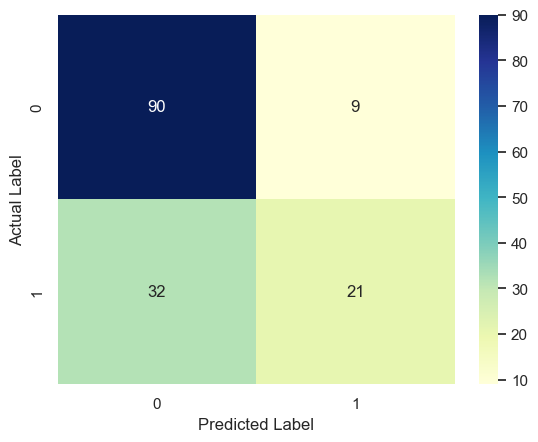

In [93]:
#Metrics for RFC
cnf_matix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matix, annot = True, cmap = "YlGnBu")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.91      0.81        99
           1       0.70      0.40      0.51        53

    accuracy                           0.73       152
   macro avg       0.72      0.65      0.66       152
weighted avg       0.72      0.73      0.71       152



**Hyperparameter Optimization**

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# Create a RandomForestClassifier
rf_model2 = RandomForestClassifier()

In [96]:
# Define a parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

In [97]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier with the correct parameter names
rf_model2 = RandomForestClassifier(max_depth=3, max_features=2, min_samples_split=2)




In [98]:
# Create the GridSearchCV instance with the model, parameter grid, and other settings
rf_cv_model = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=-1)

In [99]:
# Fit the GridSearchCV model to your data
rf_cv_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=200),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [100]:
# look for the best parameters
rf_cv_model.best_params_

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}

In [101]:
rf_tuned = RandomForestClassifier(max_depth = 10,
                                  max_features = 2,
                                  min_samples_split = 2,
                                  n_estimators = 100)

In [102]:
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=2)

In [103]:
# Testing the model
y_pred = rf_tuned.predict(X_test)

In [104]:
# Accuracy of test
print("Accuracy_Score:", accuracy_score(y_test, y_pred))

Accuracy_Score: 0.743421052631579


In [105]:
print(confusion_matrix(y_test, y_pred))

[[90  9]
 [30 23]]


Text(0.5, 20.049999999999997, 'Predicted Label')

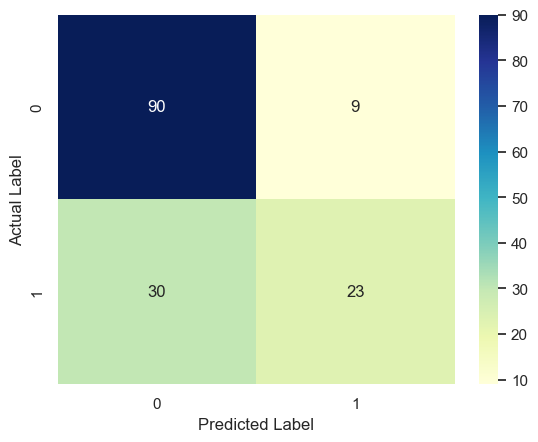

In [106]:
#Metrics for RFC
cnf_matix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matix, annot = True, cmap = "YlGnBu")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")

In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82        99
           1       0.72      0.43      0.54        53

    accuracy                           0.74       152
   macro avg       0.73      0.67      0.68       152
weighted avg       0.74      0.74      0.72       152



In [108]:
# compute AUC-score
auc = roc_auc_score(y_test, y_pred)

# print AUC-score
print(auc)

0.6715265866209262


In [109]:
# Lets Identify important features
rf_tuned.feature_importances_

array([0.07034975, 0.16491442, 0.07521579, 0.06464432, 0.05684448,
       0.11096136, 0.10246073, 0.08958126, 0.01646058, 0.01417982,
       0.01562986, 0.01841535, 0.00019868, 0.02384664, 0.00354077,
       0.03660885, 0.01563035, 0.05982192, 0.01737483, 0.00736081,
       0.0002537 , 0.03570574])

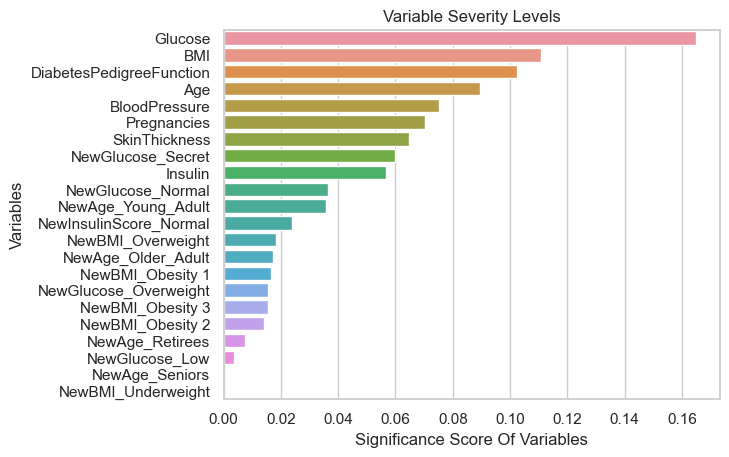

In [110]:
feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()

**Note:**

- It is clearly visible from the graph above that Glucose as a feature has the most importance in this dataset.

**MODEL COMPARISON**

- Based on the models chosen: Support Vector Classifier (SVC) and RandomForestClassifier (RFC).
- RandomForestClassifier (RFC) is the best model for this prediction with 0.78 accuracy.

# PART IV

  Here are the findings from the machine learning models developed and the exploratory data analysis (EDA):

     1. Glucose levels exhibit a strong correlation coefficient of approximately 0.47,
        indicating their significance as a robust indicator of diabetes. In contrast,
        both BloodPressure and SkinThickness display lower correlation coefficients of
        around 0.07, suggesting they are weaker indicators of diabetes.

     2. When the predictor correlations were examined, there are 2 predictor
        variables that act as a positive correlation to the Outcome dependent variable.
        These variables are Glucose and BMI, followed by Pregancies. 
        As these increase, Outcome variable increases.

     3. The age group between 21 and 45 years predominantly experiences diabetes,
        as revealed by the EDA.

     4. The accuracy of the Random Forest model stands out at 78%, surpassing
        that of SVC which was at 72%. This indicates that Random Forest is a
        viable ensemble technique for enhancing model performance.